In [12]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from numpy import argmax
import sys

keras 의 mnist.load_data() 함수는 자동으로 mnist 데이터를 60000개의 훈련데이터와 10000개의 테스트데이터로 분리 할당함

In [13]:
# 1. 실무에 사용할 데이터 준비하기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('훈련데이터 x개수 =' + str(x_train.shape))
print('시험데이터 x개수 =' + str(x_test.shape))
print('훈련데이터 y개수 =' + str(y_train.shape))
print('시험데이터 y개수 =' + str(y_test.shape))

훈련데이터 x개수 =(60000, 28, 28)
시험데이터 x개수 =(10000, 28, 28)
훈련데이터 y개수 =(60000,)
시험데이터 y개수 =(10000,)


x_train, x_test 데이터들을 784개 1차원 배열로 변환하되 255 로 나누어 0~1 사이로 정규화하는 루틴.

In [14]:
# 데이터셋 전처리
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

print(y_train[25])
for x in x_train[25]:
    for i in x:
        sys.stdout.write('%d\t'%i)
    sys.stdout.write('\n')

np_utils.to_categorical 은 0~9 까지의 테스트 데이터를 원핫인코딩해주는 함수. 
아마도 10은 디폴트인가 봄.
예를 들어, 9는 [0 0 0 0 0 0 0 0 0 1] 이 됨

In [15]:
# 원핫인코딩 (one-hot encoding) 처리
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

np.random.choice 는 해당 행렬에서 5개 만큼 랜덤으로 선택해주는 함수
numpy.random.choice(a, size=None, replace=True, p=None)
a : 배열이면 원래의 데이터, 정수이면 range(a) 명령으로 데이터 생성
size : 정수. 샘플 숫자
replace : 불리언. True이면 한번 선택한 데이터를 다시 선택 가능
p : 배열. 각 데이터가 선택될 수 있는 확률

In [16]:
# 훈련셋과 검증셋 분리
x_val = x_train[:18000] # 훈련셋의 30%를 검증셋으로 사용
x_train = x_train[18000:]
y_val = y_train[:18000] # 훈련셋의 30%를 검증셋으로 사용
y_train = y_train[18000:]

print(x_val.shape)
print(x_train.shape)

(18000, 784)
(42000, 784)


In [17]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [18]:
# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [19]:
# 4. 모델 학습시키기
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val))

Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 2s 48us/step - loss: 0.7511 - acc: 0.8162 - val_loss: 0.4343 - val_acc: 0.8804
Epoch 2/5
42000/42000 [==============================] - 2s 39us/step - loss: 0.3749 - acc: 0.8971 - val_loss: 0.3535 - val_acc: 0.9022
Epoch 3/5
42000/42000 [==============================] - 2s 38us/step - loss: 0.3219 - acc: 0.9099 - val_loss: 0.3200 - val_acc: 0.9100
Epoch 4/5
42000/42000 [==============================] - 2s 38us/step - loss: 0.2934 - acc: 0.9171 - val_loss: 0.2959 - val_acc: 0.9156
Epoch 5/5
42000/42000 [==============================] - 2s 37us/step - loss: 0.2729 - acc: 0.9232 - val_loss: 0.2798 - val_acc: 0.9206


In [20]:
# 5. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('')
print('loss_and_metrics : ' + str(loss_and_metrics))

10000/10000 [==============================] - 0s 15us/step

loss_and_metrics : [0.2590601786494255, 0.9281]


In [21]:
# 6. 모델 사용하기
xhat_idx = np.random.choice(x_test.shape[0], 5)
xhat = x_test[xhat_idx]
yhat = model.predict_classes(xhat)

In [22]:
for i in range(5):
    print('True : ' + str(argmax(y_test[xhat_idx[i]])) + ', Predict : ' + str(yhat[i]))

True : 0, Predict : 0
True : 9, Predict : 9
True : 3, Predict : 3
True : 4, Predict : 4
True : 7, Predict : 7


In [23]:
# 학습된 모델 저장하기

from keras.models import load_model

model.save('mnist_mlp_model.h5')

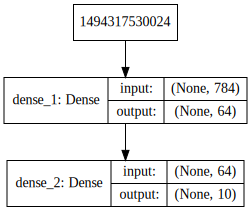

In [24]:
# 모델 아키텍쳐 확인
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))